In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

In [4]:
def get_snapshot_at_level(ds,tt,zz,fld):
    W = ds[fld][tt,zz,:,:]
    return(W)

def get_eta_snapshot(ds,tt,fld):
    W = ds[fld][tt,:,:]
    return(W)

def plot_field_w(ax,tt,lon,lat,eta,time,mask,zind,
                 cmap=cmo.cm.balance,vmin=-0.3, vmax=0.3, title=' ', cbar=False):
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat, 
                       np.ma.masked_array(eta,mask=mask[zind,:,:]),
                       cmap=cmap, vmin=vmin, vmax=vmax)
    ax.contour(lon,lat,depth_nob, levels=[0], color='k')
    ax.contour(lon,lat,depth_bay, levels=[0], color='0.5')
      
    if cbar=='right':
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755]) 
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=cbar_ax, orientation='vertical', 
                          format='%1.1f', label=r'$\eta$ (cm)')
    
    
    if cbar=='center':
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.485, 0.125, 0.022, 0.755]) 
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=cbar_ax, orientation='vertical', 
                          format='%1.1f')
    
    ax.set_title('%s t=%1.1f h'%(title,time[tt]/3600))
    ax.set_aspect(1)
    return(ax)

def init():
    tt=144*2
    Wbay1 = get_snapshot_at_level(ds, 0, zz, 'WVEL')
    Wnb1 = get_snapshot_at_level(ds2, 0, zz, 'WVEL')
    
    Wbay2 = get_snapshot_at_level(ds, 0, zz2, 'WVEL')
    Wnb2 = get_snapshot_at_level(ds2, 0, zz2, 'WVEL')
    
    axx= plot_field_w(ax1,tt,lon,lat,(Wbay1-Wnb1)*1E5,time,
                      mask,zz,cmap=cmap, vmin=-0.3, vmax=0.3,cbar='center',title='Bay-No Bay')
    axxx = plot_field_w(ax2,tt,lon,lat,(Wbay2-Wnb2)*1E5,time,
                        mask,zz2,cmap=cmap, vmin=-0.8, vmax=0.8, cbar='right', title='Bay')
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax2.set_yticks([])

def animate(t):
    tt=(144*2)+2*t
    #tt=t
    print(tt)
    Wbay1 = get_eta_snapshot(ds, tt, 'ETAN')
    Wnb1 = get_eta_snapshot(ds2, tt, 'ETAN')
        
    axx= plot_field_w(ax1,tt,lon,lat,(Wbay1-Wnb1)*1E2,
                      time,mask,zz,cmap=cmap, vmin=-0.3, vmax=0.3, title='Bay-No Bay')
    axxx = plot_field_w(ax2,tt,lon,lat,(Wbay1)*1E2,
                        time,maskSVB,zz2,cmap=cmap, vmin=-0.8, vmax=0.8, title='Bay')
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax2.set_yticks([]) 

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

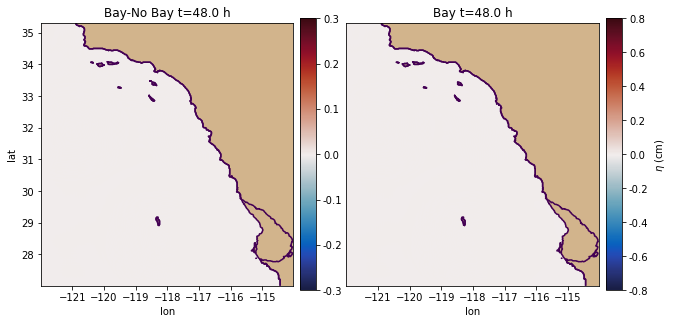

In [6]:
cmap=cmo.cm.balance
zz = 0
zz2 = 0

fig = plt.figure(figsize=(10,5))
gs = GridSpec(1,2, width_ratios=[1,1], wspace=0.21)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Uncomment lines below to run and save animation
anim = animation.FuncAnimation(fig, animate, init_func=init, blit=False,
                               frames=60, repeat=False)
#anim.save('ssh_Bay-NoBay_febTS.mp4', writer=writer)

### Days 2-5

288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526
528
530
532
534
536
538
540
542
544
546
548
550
552
554
556
558
560
562
564
566
568
570
572
574


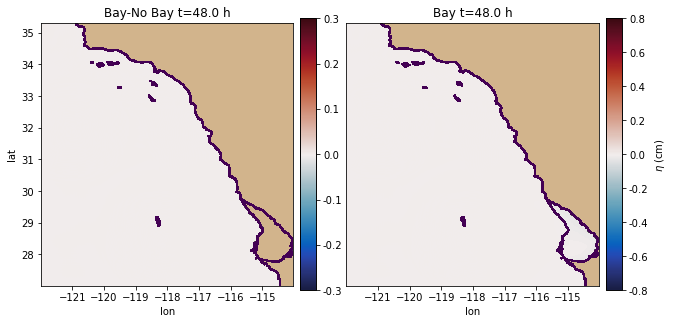

In [7]:
cmap=cmo.cm.balance
zz = 0
zz2 = 0

fig = plt.figure(figsize=(10,5))
gs = GridSpec(1,2, width_ratios=[1,1], wspace=0.21)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Uncomment lines below to run and save animation
anim = animation.FuncAnimation(fig, animate, init_func=init, blit=False,
                               frames=144, repeat=False)
anim.save('ssh_Bay-NoBay_febTS_day2.mp4', writer=writer)